In [26]:
import os
l=[]
img_path="/kaggle/input/nails-segmentation-2/images/"
lbl_path="/kaggle/input/nails-segmentation-2/labels/"
for i in os.listdir(img_path):
    l.append(i)
l



['2c376c66-9823-4874-869e-1e7f5c54ec7b.jpg',
 'ABD5AB5C-E7CA-4420-A983-2161029ECC9E.jpg',
 'feb2c029-b89c-4ce5-b208-db2114516a40.jpg',
 'F6F9B3E6-FA7B-4DAC-B08C-1AD19BC43A76.jpg',
 'd60f3ecc-db67-11e8-9658-0242ac1c0002.jpg',
 'd6072ec6-db67-11e8-9658-0242ac1c0002.jpg',
 '869CDA2E-8251-4880-89D6-9409CBC416F3.jpg',
 'd62b0cd8-db67-11e8-9658-0242ac1c0002.jpg',
 '964c11f9-fbe3-420e-8674-9bb356cb5d3f.jpg',
 '865a1e90-7ad2-4ceb-b2a1-50b07875c5c7.jpg',
 'a3a73edd-1483-4413-addb-9a7264b5d853.jpg',
 '917FB1CC-E132-497F-A463-46C61A84BB40.jpg',
 'C03527E3-ADED-423E-9F11-D797EA35E286.jpg',
 'd639e532-db67-11e8-9658-0242ac1c0002.jpg',
 '4c472e18-e402-11e8-97db-0242ac1c0002.jpg',
 '4c46b91a-e402-11e8-97db-0242ac1c0002.jpg',
 '4c48acb6-e402-11e8-97db-0242ac1c0002.jpg',
 '09aefeec-e05f-11e8-87a6-0242ac1c0002.jpg',
 '4c47ee66-e402-11e8-97db-0242ac1c0002.jpg',
 '41d83dbb-7c39-4d91-979e-eec5ff71b265.jpg',
 '34404E67-4BB8-432E-863E-C1BEF5EB37E0.jpg',
 '7e9f5818-4425-4d8a-808a-4673d96fa250.jpg',
 'af5626a5

In [27]:

import torch
from PIL import Image
from torch.utils.data import Dataset
class CustomDst(Dataset):
    def __init__(self, list_of_img, image_path, labels_path, img_size=(224, 224)):
        self.image_path = image_path
        self.labels_path = labels_path
        self.list_of_img = list_of_img
        self.img_size = img_size  

        self.img_transform = transforms.Compose([
            transforms.Resize(self.img_size),  
            transforms.ToTensor(),
            transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
        ])

        self.mask_transform = transforms.Compose([
            transforms.Resize(self.img_size),  
            transforms.ToTensor()
        ])

    def __len__(self):
        return len(self.list_of_img)

    def __getitem__(self, idx):
        img_path = os.path.join(self.image_path, self.list_of_img[idx])
        label_path = os.path.join(self.labels_path, self.list_of_img[idx])

        img = Image.open(img_path).convert("RGB")  
        label = Image.open(label_path).convert("L") 

        img = self.img_transform(img)
        label = self.mask_transform(label)

        label = torch.where(label > 0.5, 1.0, 0.0)

        return img, label
    

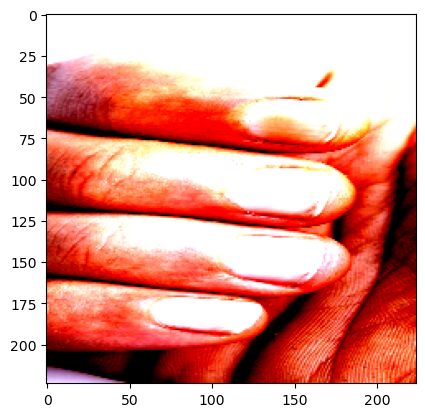

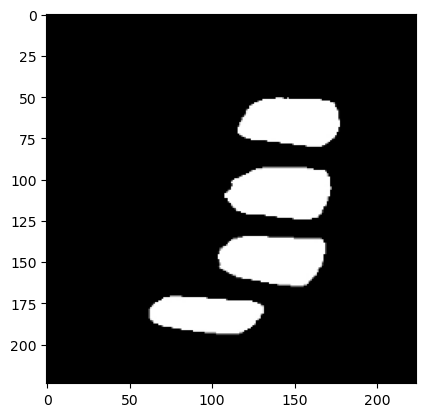

In [28]:

import matplotlib.pyplot as plt
from torchvision.transforms import Resize,ToTensor,Normalize

img=Image.open("/kaggle/input/nails-segmentation-2/images/09aefeec-e05f-11e8-87a6-0242ac1c0002.jpg")
img=Resize((224,224))(Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))(ToTensor()(img)))
plt.imshow(img.permute(2,1,0))
plt.show()
img=Image.open("/kaggle/input/nails-segmentation-2/labels/09aefeec-e05f-11e8-87a6-0242ac1c0002.jpg")
img=Resize((224,224))(ToTensor()(img))
plt.imshow(img.permute(2,1,0))
plt.show()

In [29]:

from torchvision import transforms

from torch.utils.data import DataLoader, Dataset

In [ ]:

dataset = CustomDst(l, img_path, lbl_path, img_size=(224, 224))

train_loader = DataLoader(dataset, batch_size=8, shuffle=True, num_workers=4)


In [31]:
print("Dataset length:",dataset.__len__())

Dataset length: 52


In [32]:

train,test=torch.utils.data.random_split(dataset,(45,7))

In [33]:

from torch.utils.data import DataLoader
train_loader=DataLoader(train,batch_size=2,shuffle=True,drop_last=True)
test_loader=DataLoader(test,batch_size=2)

Checking a sample of dataset


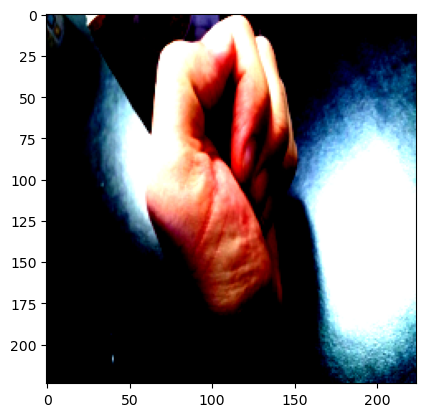

torch.Size([1, 224, 224])


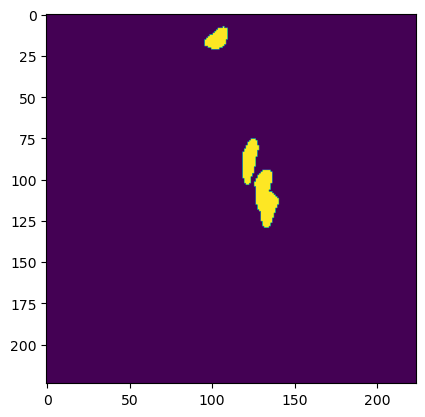

In [34]:

print("Checking a sample of dataset")
for i in dataset:
    plt.imshow(i[0].permute(1,2,0))
    plt.show()
    print(i[1].shape)
    plt.imshow(i[1][0])
    plt.show()
    break

In [35]:

from torchvision.models.segmentation import deeplabv3_resnet101, DeepLabV3_ResNet101_Weights
import torch.nn as nn

In [ ]:

from torchvision.models.segmentation import deeplabv3_resnet101, DeepLabV3_ResNet101_Weights
import torch.nn as nn


model = deeplabv3_resnet101(weights=DeepLabV3_ResNet101_Weights.DEFAULT)

model.classifier[4] = nn.Conv2d(256, 1, kernel_size=1)
model.aux_classifier[4] = nn.Conv2d(256, 1, kernel_size=1)

print(model)


DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [37]:

total_params = sum(p.numel() for p in model.parameters())
print(f"{total_params:,} total parameters.")
total_trainable_params = sum(
    p.numel() for p in model.parameters() if p.requires_grad)
print(f"{total_trainable_params:,} training parameters.")

60,985,922 total parameters.
60,985,922 training parameters.


In [38]:

from torch.optim.lr_scheduler import CosineAnnealingLR

In [39]:

import torch.optim as optim
from torch.cuda.amp import autocast, GradScaler
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [ ]:

def iou_score(preds, targets, threshold=0.5):
    preds = torch.sigmoid(preds)  
    preds, targets = preds.float(), targets.float() 
    preds = (preds > threshold).float()  
    intersection = (preds * targets).sum()
    union = preds.sum() + targets.sum() - intersection
    return (intersection + 1e-6) / (union + 1e-6)  

In [ ]:

class DiceLoss(nn.Module):
    def __init__(self, smooth=1e-6):
        super(DiceLoss, self).__init__()
        self.smooth = smooth

    def forward(self, preds, targets):
        preds = torch.sigmoid(preds).float()  
        targets = targets.float()
        intersection = (preds * targets).sum()
        dice = (2. * intersection + self.smooth) / (preds.sum() + targets.sum() + self.smooth)
        return 1 - dice

In [ ]:

loss_fn = DiceLoss()

opt = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = CosineAnnealingLR(opt, T_max=25)
scaler = GradScaler()  


In [ ]:

for epoch in range(50):
    model.train()
    running_loss, running_iou, items = 0.0, 0.0, 0

    for X, y in train_loader:
        X, y = X.to(device, dtype=torch.float32), y.to(device, dtype=torch.float32)  
        
        opt.zero_grad()
        
        with autocast():
            yhat = model(X)['out']  
            yhat = yhat.float()  
            loss = loss_fn(yhat, y)

        scaler.scale(loss).backward()
        scaler.step(opt)
        scaler.update()

        running_loss += loss.item()
        running_iou += iou_score(yhat, y).item()
        items += 1

    scheduler.step()
    print(f"Epoch {epoch+1} | Train Loss: {running_loss/items:.4f} | Train IoU: {running_iou/items:.4f}")

    model.eval()
    with torch.no_grad():
        running_loss, running_iou, items = 0.0, 0.0, 0

        for X, y in test_loader:
            X, y = X.to(device, dtype=torch.float32), y.to(device, dtype=torch.float32)
            yhat = model(X)['out'].float()
            loss = loss_fn(yhat, y)

            running_loss += loss.item()
            running_iou += iou_score(yhat, y).item()
            items += 1

        print(f"Test Loss: {running_loss/items:.4f} | Test IoU: {running_iou/items:.4f}")


Epoch 1 | Train Loss: 0.8611 | Train IoU: 0.1300
Test Loss: 0.8754 | Test IoU: 0.1985
Epoch 2 | Train Loss: 0.7906 | Train IoU: 0.2189
Test Loss: 0.8729 | Test IoU: 0.1729
Epoch 3 | Train Loss: 0.7522 | Train IoU: 0.2638
Test Loss: 0.8674 | Test IoU: 0.2003
Epoch 4 | Train Loss: 0.7353 | Train IoU: 0.2901
Test Loss: 0.8481 | Test IoU: 0.2003
Epoch 5 | Train Loss: 0.7041 | Train IoU: 0.3294
Test Loss: 0.8325 | Test IoU: 0.2259
Epoch 6 | Train Loss: 0.6870 | Train IoU: 0.3628
Test Loss: 0.8323 | Test IoU: 0.2406
Epoch 7 | Train Loss: 0.6582 | Train IoU: 0.4051
Test Loss: 0.8138 | Test IoU: 0.2404
Epoch 8 | Train Loss: 0.6486 | Train IoU: 0.4222
Test Loss: 0.8097 | Test IoU: 0.3147
Epoch 9 | Train Loss: 0.6199 | Train IoU: 0.4654
Test Loss: 0.7920 | Test IoU: 0.2838
Epoch 10 | Train Loss: 0.6057 | Train IoU: 0.4880
Test Loss: 0.7697 | Test IoU: 0.3431
Epoch 11 | Train Loss: 0.5822 | Train IoU: 0.5159
Test Loss: 0.7635 | Test IoU: 0.3350
Epoch 12 | Train Loss: 0.5802 | Train IoU: 0.5214
Te

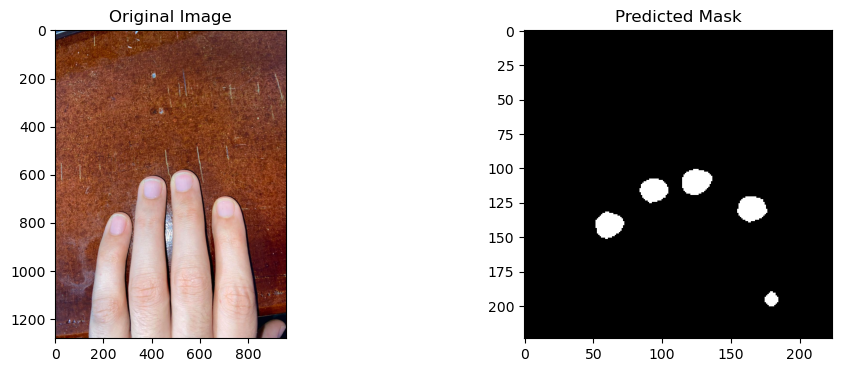

In [ ]:
from PIL import Image
import torch
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

image_path = "/kaggle/input/imagesssss/WhatsApp Image 2025-04-24 at 23.30.59_b43f12c4.jpg"

img_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

img = Image.open(image_path).convert("RGB")
input_tensor = img_transform(img).unsqueeze(0).to(device)

model.eval()
with torch.no_grad():
    output = model(input_tensor)['out']
    pred_mask = torch.sigmoid(output)  
    pred_mask = (pred_mask > 0.5).float().cpu().squeeze().numpy() 

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(pred_mask, cmap='gray')
plt.title("Predicted Mask")
plt.show()


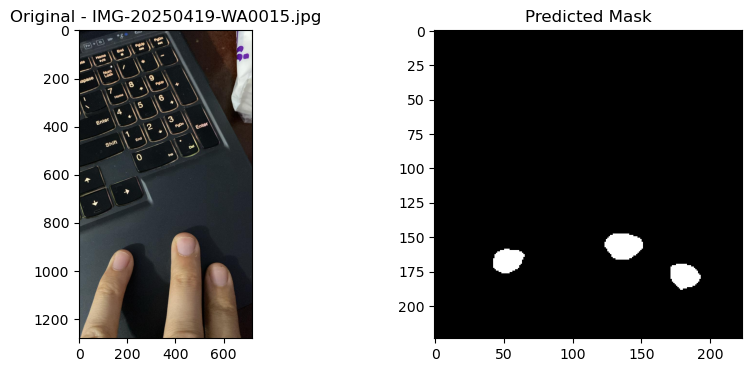

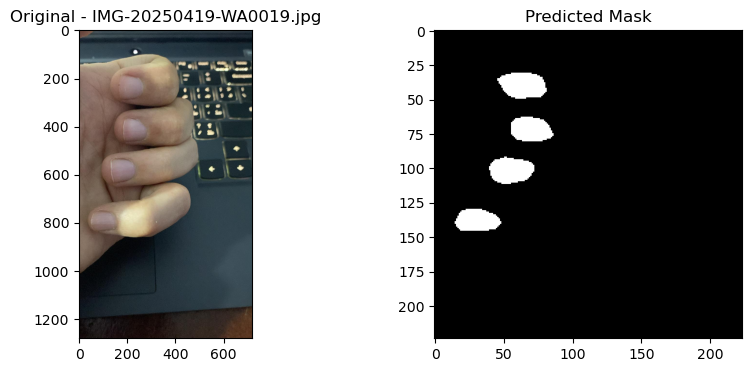

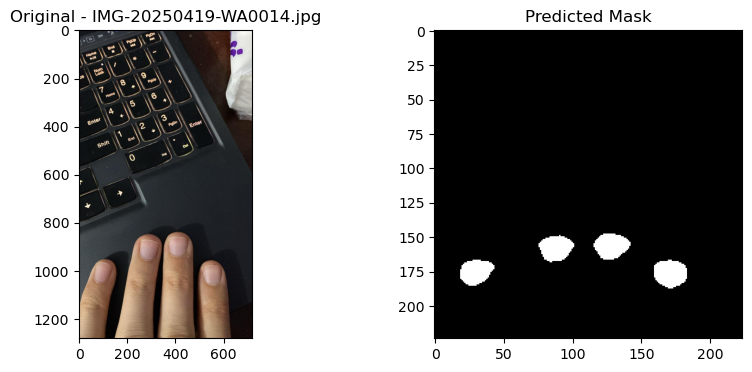

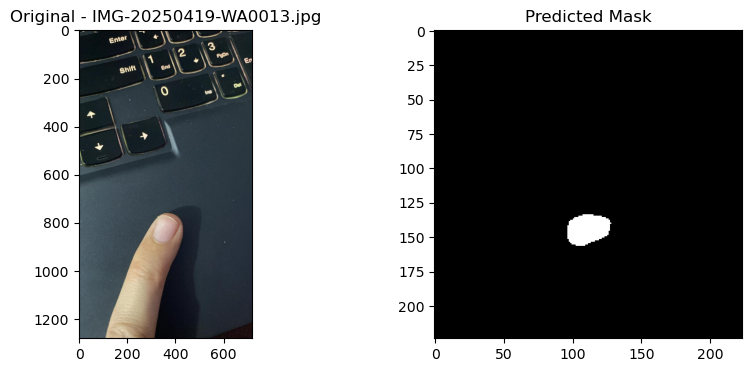

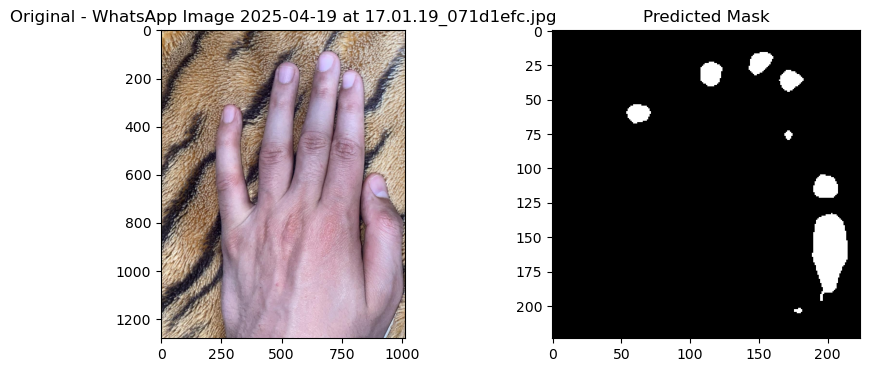

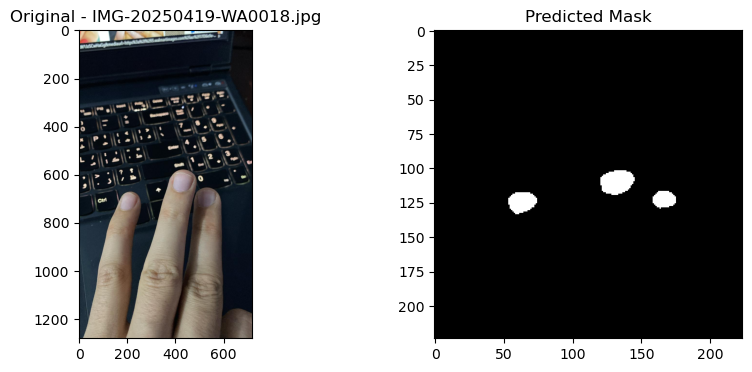

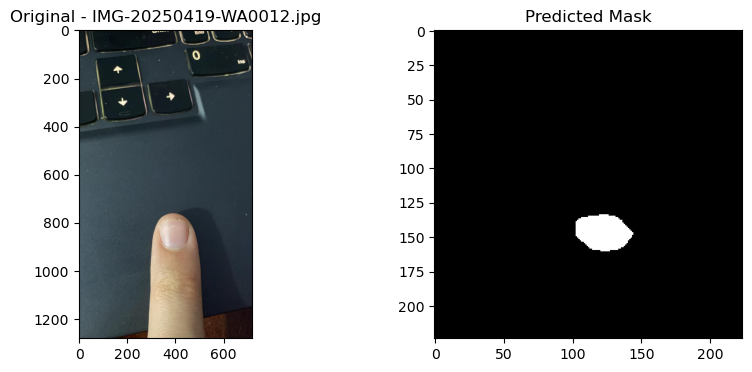

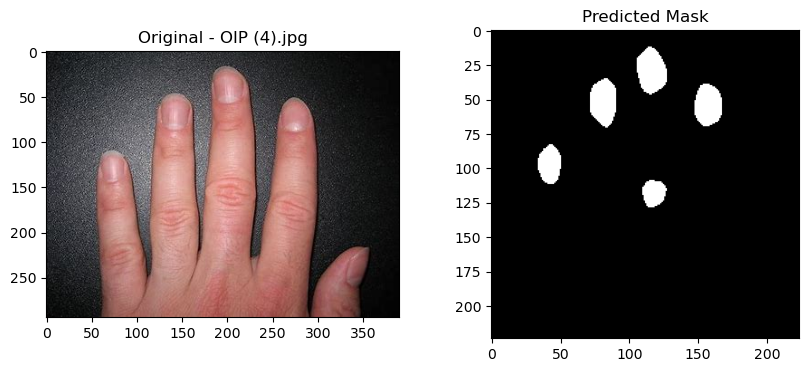

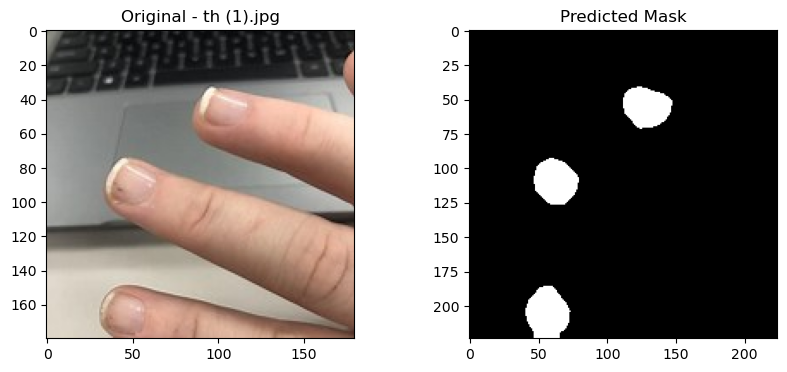

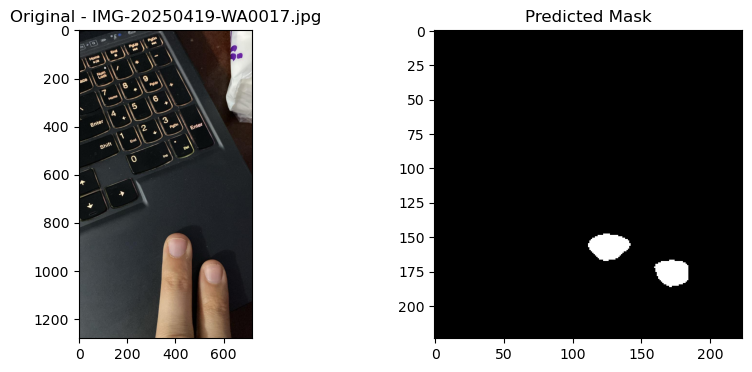

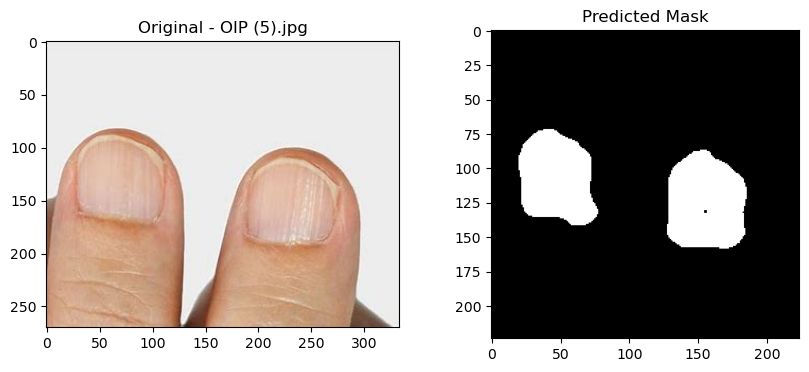

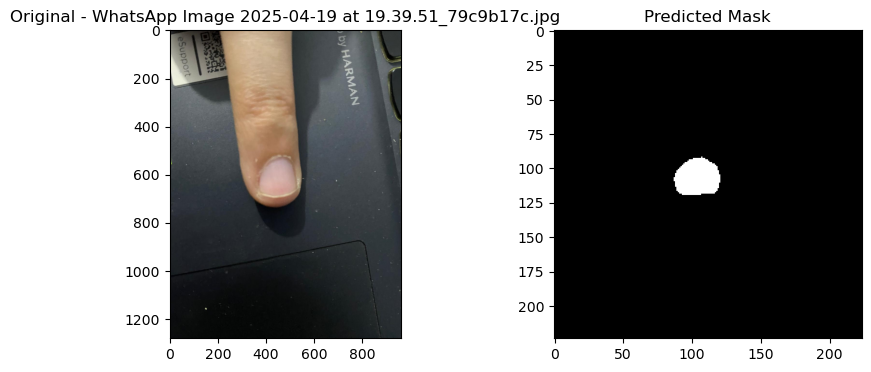

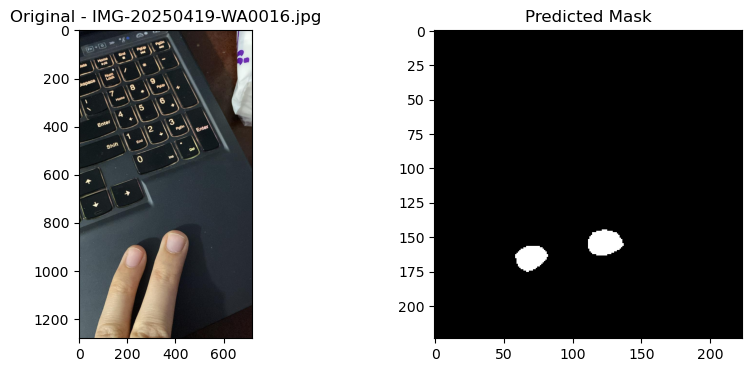

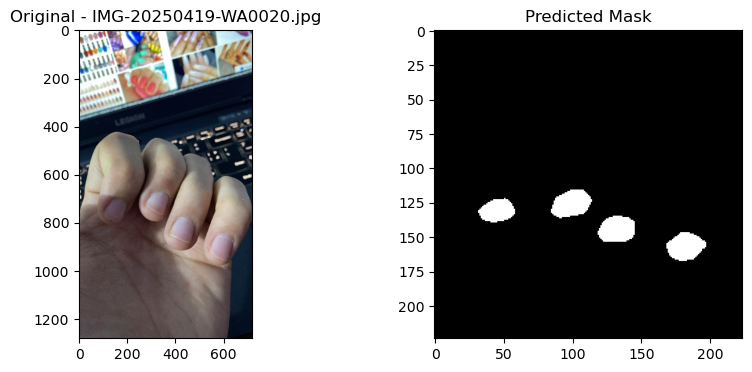

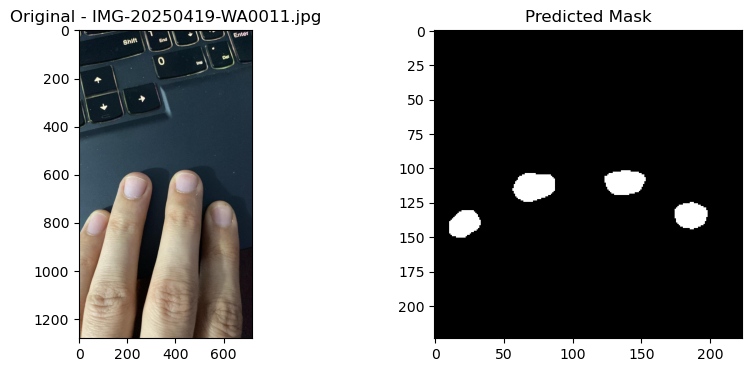

In [ ]:
import os
from PIL import Image
import torch
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

input_dir = "/kaggle/input/nails-images"

img_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

model.eval()

for file_name in os.listdir(input_dir):
    if file_name.lower().endswith((".jpg", ".png", ".jpeg")):
        img_path = os.path.join(input_dir, file_name)

        img = Image.open(img_path).convert("RGB")
        input_tensor = img_transform(img).unsqueeze(0).to(device)

        with torch.no_grad():
            output = model(input_tensor)['out']
            pred_mask = torch.sigmoid(output)
            pred_mask = (pred_mask > 0.5).float().cpu().squeeze().numpy()

        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        plt.imshow(img)
        plt.title(f"Original - {file_name}")

        plt.subplot(1, 2, 2)
        plt.imshow(pred_mask, cmap='gray')
        plt.title("Predicted Mask")

        plt.show()


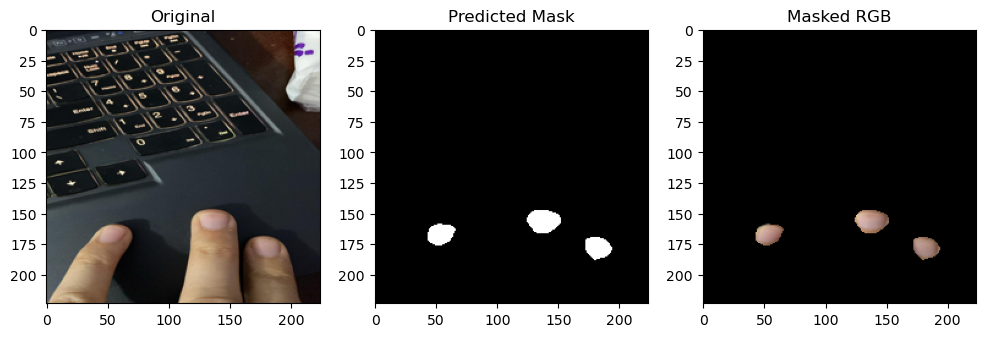

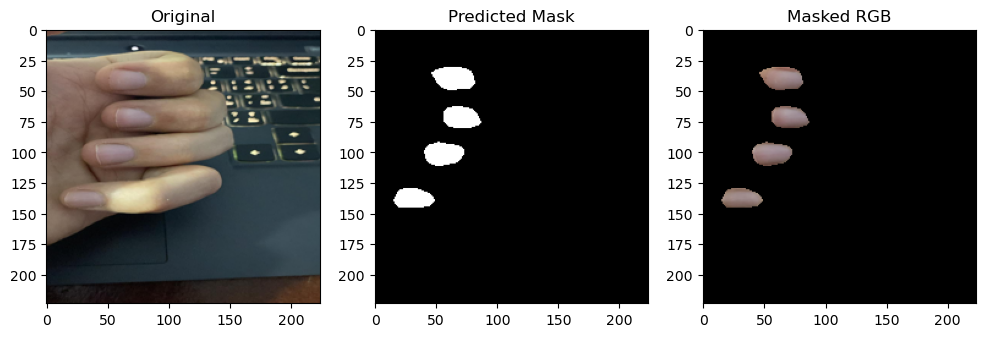

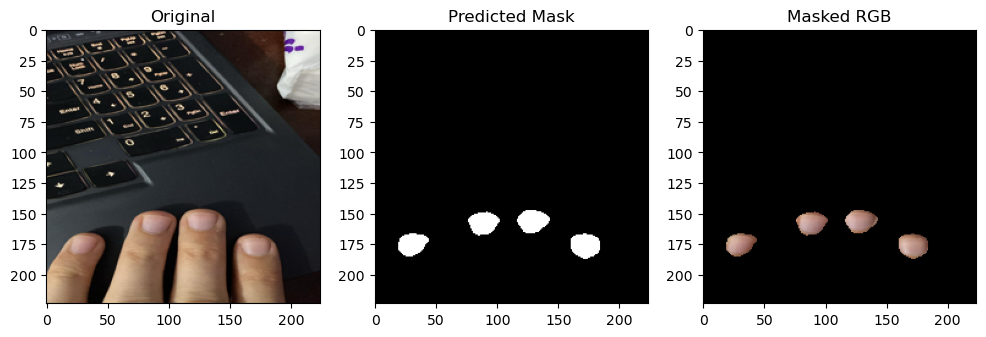

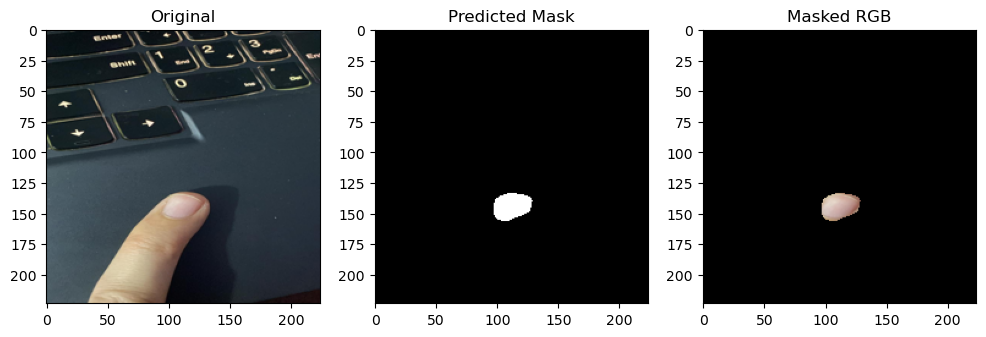

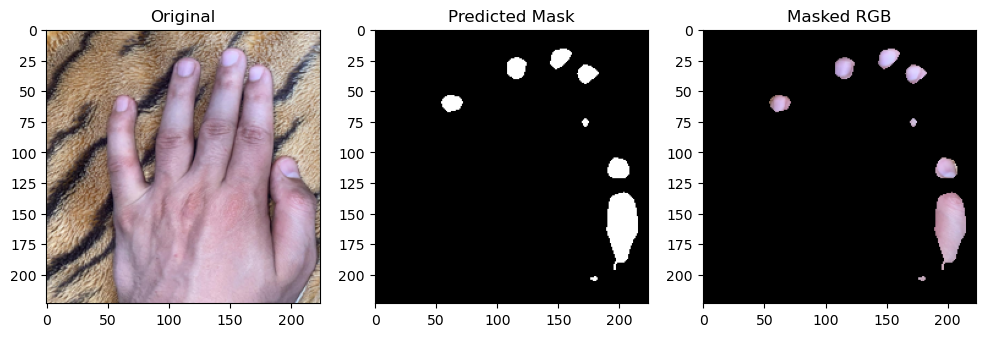

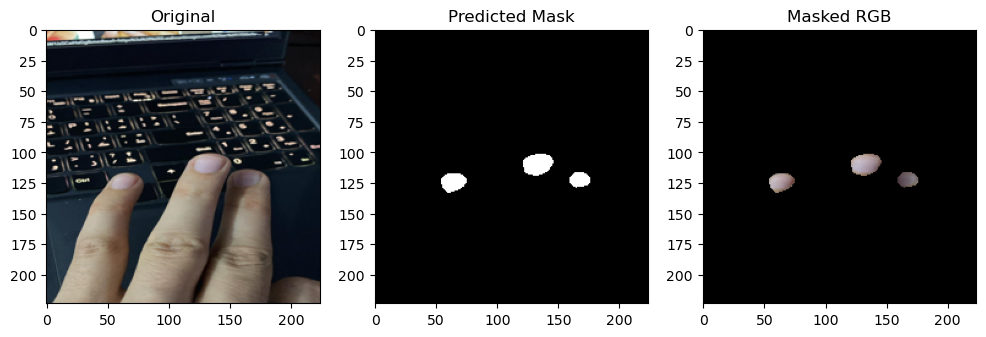

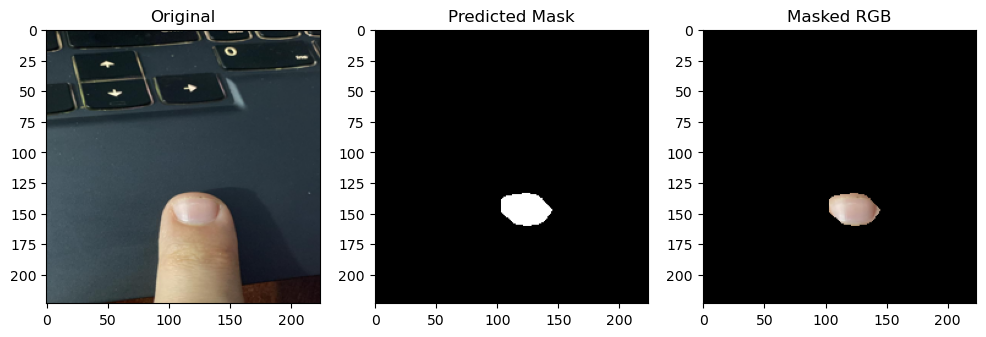

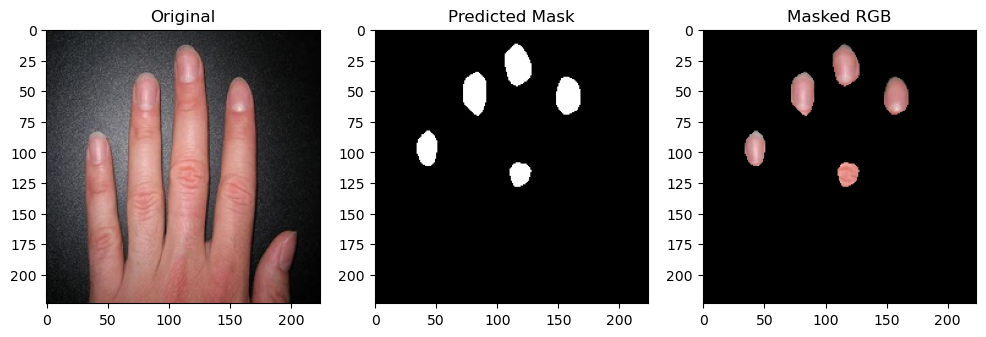

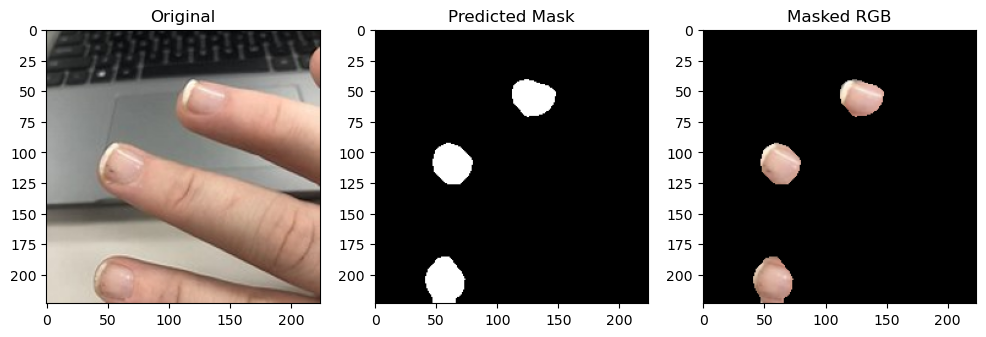

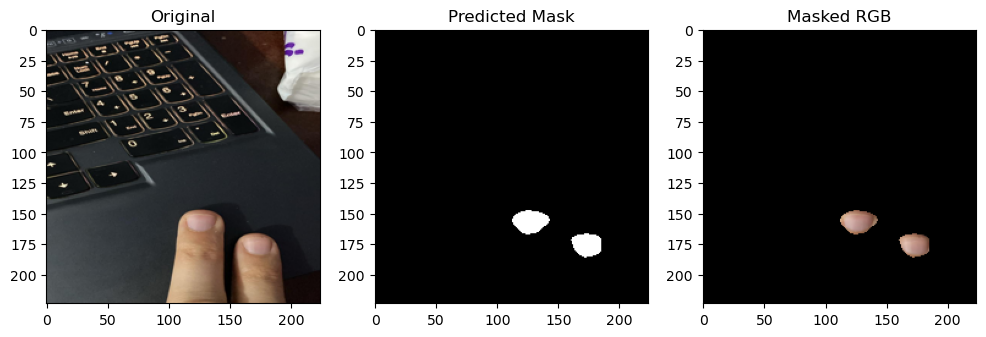

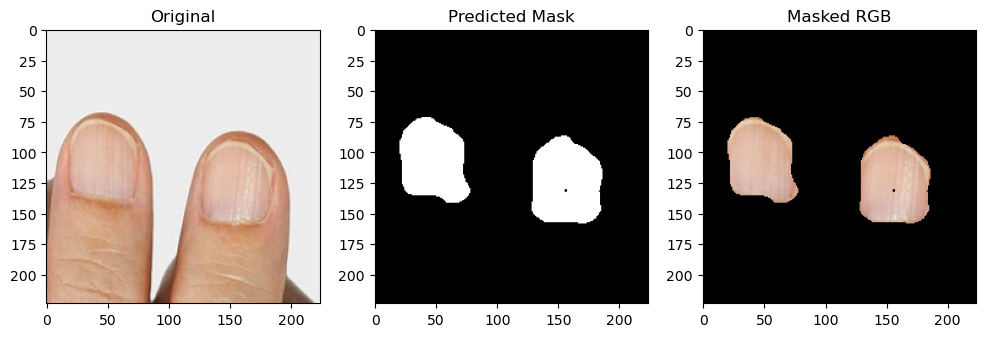

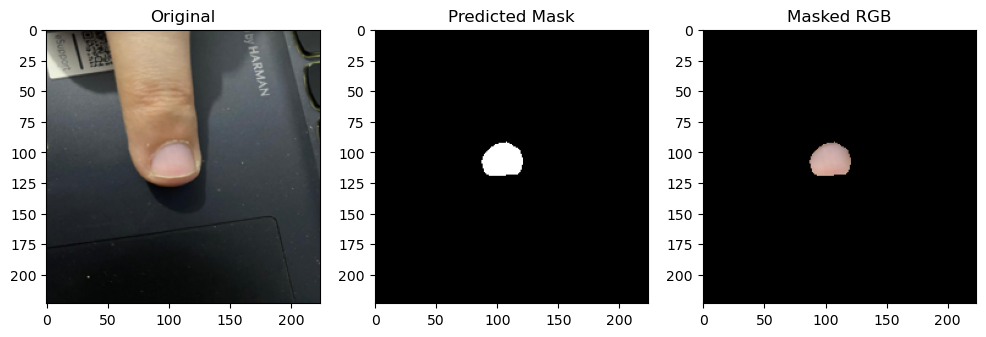

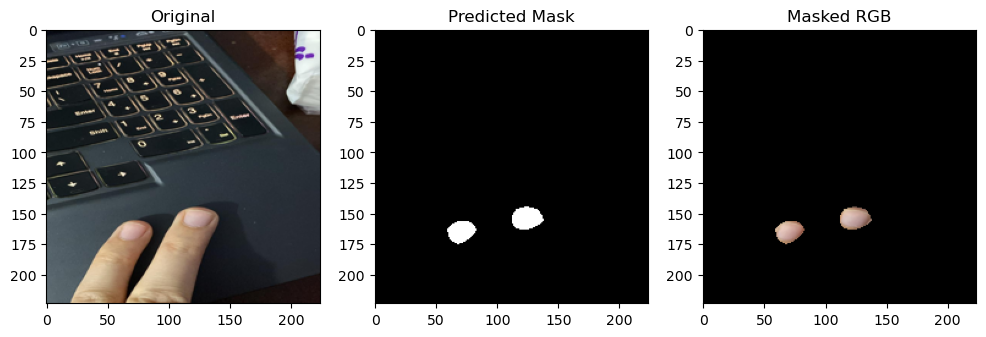

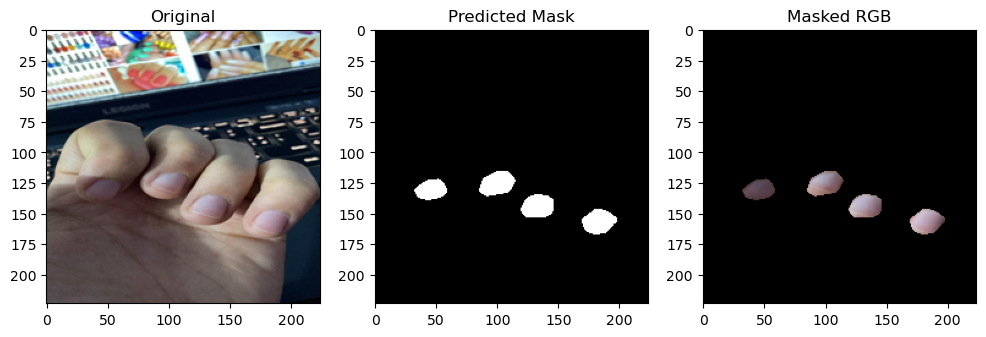

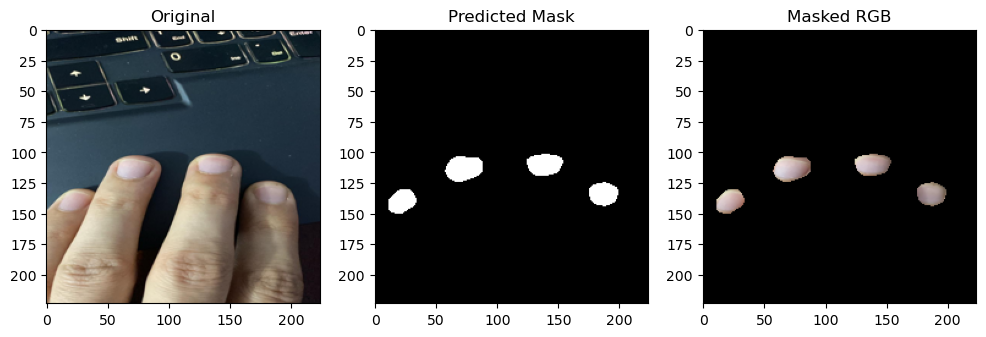

In [ ]:
import os
import numpy as np
import torch
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

input_dir = "/kaggle/input/nails-images"

img_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])
raw_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

model.eval()

for file_name in os.listdir(input_dir):
    if file_name.lower().endswith((".jpg", ".jpeg", ".png")):
        img_path = os.path.join(input_dir, file_name)

        img_pil = Image.open(img_path).convert("RGB")
        img_tensor = img_transform(img_pil).unsqueeze(0).to(device)
        raw_tensor = raw_transform(img_pil)  

        with torch.no_grad():
            output = model(img_tensor)['out']
            pred_mask = torch.sigmoid(output)
            pred_mask = (pred_mask > 0.5).float().cpu().squeeze(0) 

        masked_rgb = raw_tensor * pred_mask  

        masked_img_np = masked_rgb.permute(1, 2, 0).numpy()
        masked_img_np = np.clip(masked_img_np, 0, 1)

        plt.figure(figsize=(12, 4))
        plt.subplot(1, 3, 1)
        plt.imshow(img_pil.resize((224, 224)))
        plt.title("Original")

        plt.subplot(1, 3, 2)
        plt.imshow(pred_mask.squeeze(), cmap='gray')
        plt.title("Predicted Mask")

        plt.subplot(1, 3, 3)
        plt.imshow(masked_img_np)
        plt.title("Masked RGB")

        plt.show()


In [48]:
#torch.save(model.state_dict(), "deeplab_nail_segmentation_weights.pth")


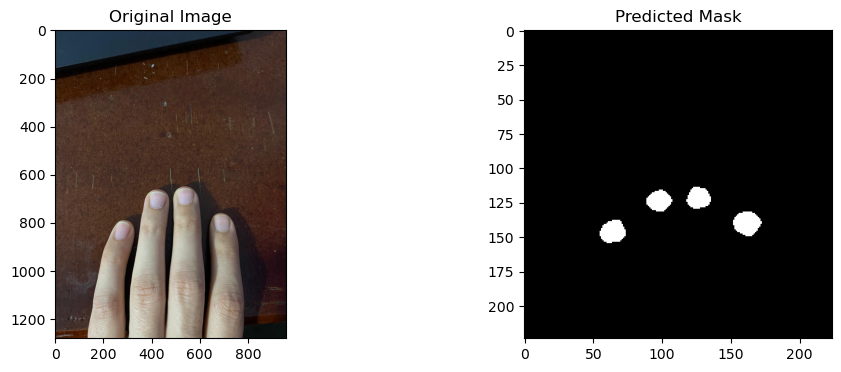

In [ ]:
from PIL import Image
import torch
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

image_path = "/kaggle/input/imagesssss/WhatsApp Image 2025-04-24 at 23.30.59_a4fbd4f3.jpg"

img_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

img = Image.open(image_path).convert("RGB")
input_tensor = img_transform(img).unsqueeze(0).to(device)

model.eval()
with torch.no_grad():
    output = model(input_tensor)['out']
    pred_mask = torch.sigmoid(output)  
    pred_mask = (pred_mask > 0.5).float().cpu().squeeze().numpy()  

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(pred_mask, cmap='gray')
plt.title("Predicted Mask")
plt.show()


In [ ]:
torch.save(model, "deeplabv3_full_model_with architecture1_5_2025_6_20.pth")

#for load 

#model = torch.load("model_full.pth")
#model.eval()


In [53]:
torch.save(model.state_dict(), "deeplabv3_weights_only1_5_2025_6_20).pth")
#for load 
#from model import get_model_architecture  # your function to define model
#model = get_model_architecture()
#model.load_state_dict(torch.load("model_weights.pth"))
#model.eval()